In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [2]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def undistort(image, mtx, dist):
    return  cv2.undistort(image, mtx, dist, None, mtx)

In [29]:
# we only use images, that detected nx x ny corners.
def calibrate_camera(path, nx=9, ny=6, draw=True):
    files = glob.glob(path)
    obj_points = []
    img_points = []

    # we fill obj_p with coordinates (0,0,0),(1,0,0)(2,0,0)...(9,6,0)
    obj_p = np.zeros((9*6,3), np.float32)
    k = 0
    for i in range(0,6):
        for j in range(0,9):
            obj_p[k,0] = j
            obj_p[k,1] = i
            k+=1


    for filename in files:
        image = cv2.imread(filename)
        gray = grayscale(image)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        if ret:
            obj_points.append(obj_p)
            img_points.append(corners)
            if draw:
                cv2.drawChessboardCorners(image, (nx, ny) , corners, ret)
                plt.imshow(image)

    return cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None) #  ret, mtx, dist, rvecs, tvecs

In [30]:
def warpPerspective(image, corners, img_size):
    src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    offset = 50 
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                 [img_size[0]-offset, img_size[1]-offset], 
                                 [offset, img_size[1]-offset]])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(image, M, img_size)
    return M, warped

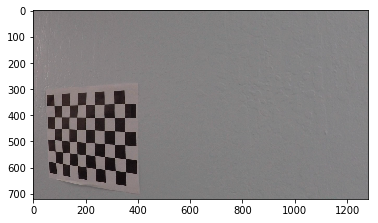

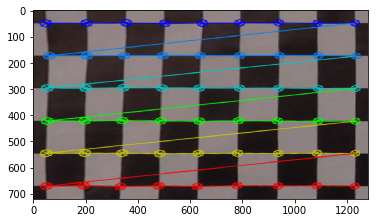

In [31]:
nx = 9
ny = 6
ret, mtx, dist, rvecs, tvecs = calibrate_camera('camera_cal/calibration*.jpg', nx, ny, False)



image = cv2.imread('camera_cal/calibration20.jpg')
undt = undistort(image, mtx, dist)

gray = grayscale(undt)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

if ret:
    cv2.drawChessboardCorners(undt, (nx, ny), corners, ret)
    M, warped = warpPerspective(undt, corners, (gray.shape[1], gray.shape[0]))

    plt.imshow(image)
    plt.figure()
    plt.imshow(warped)
